
# Modeling example EGU25




In [1]:
# Required imports
import gempy as gp
import gempy_viewer as gpv
import numpy as np

Setting Backend To: AvailableBackends.numpy


### 1) Setting up a model

In [2]:
# Define the path to data
data_path = 'https://raw.githubusercontent.com/cgre-aachen/gempy_data/master/'
path_to_data = data_path + "/data/input_data/jan_models/"

In [3]:
# Create a GeoModel instance
geo_model = gp.create_geomodel(
    project_name='EGU_example',
    extent=[0, 2500, 0, 1000, 0, 1000],
    resolution=[125, 50, 50],
    importer_helper=gp.data.ImporterHelper(
        path_to_orientations=path_to_data + "model7_orientations.csv",
        path_to_surface_points=path_to_data + "model7_surface_points.csv"
    )
)

Surface points hash:  dd7b2f714c1c20cb7ce615c5c47ecc4cf3ca2ee3419e4090b2f11fbf633d459f
Orientations hash:  4043b59bbfa7012abd818f04f74e2b0667ba970dd71c781512289bc073f5a6d5


C:\Users\vonha\PycharmProjects\egu25_gempy_workshop\venv\Lib\site-packages\gempy_viewer\API\_plot_2d_API.py:174: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  p.fig.show()


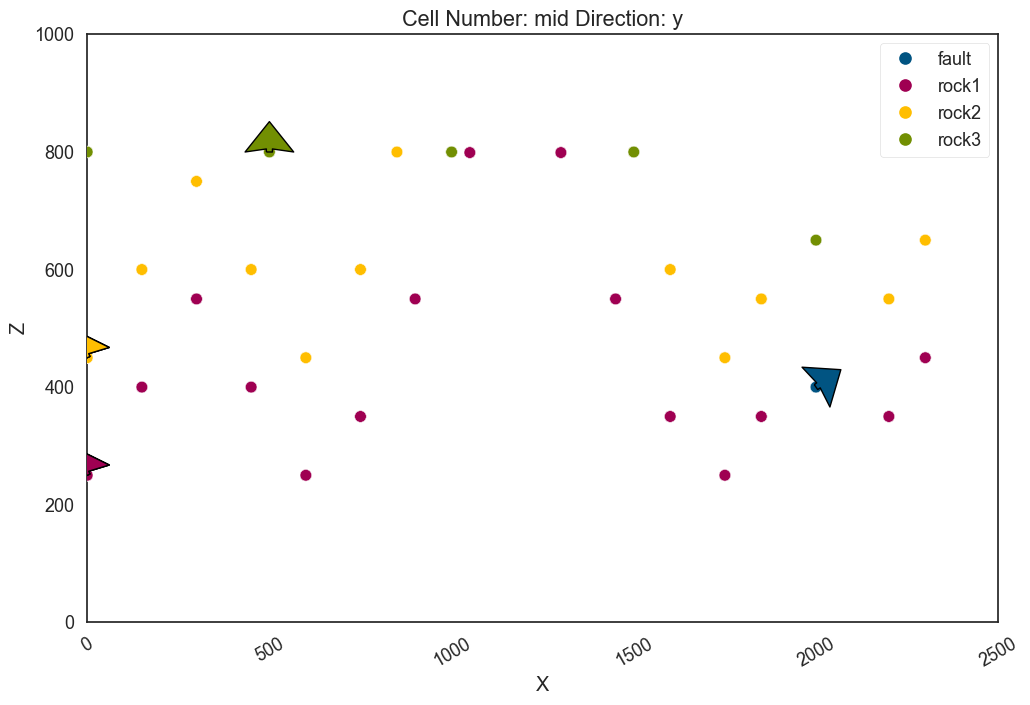

In [4]:
# Display a basic cross section of input data
gpv.plot_2d(geo_model)

### 2) The Structural frame

In [5]:
# Print the strucutral frame
geo_model.structural_frame

StructuralFrame(
	structural_groups=[
StructuralGroup(
	name=default_formation,
	structural_relation=StackRelationType.ERODE,
	elements=[
Element(
	name=fault,
	color=#015482,
	is_active=True
),
Element(
	name=rock1,
	color=#9f0052,
	is_active=True
),
Element(
	name=rock2,
	color=#ffbe00,
	is_active=True
),
Element(
	name=rock3,
	color=#728f02,
	is_active=True
)
]
)
],
	fault_relations=
[[False]],

In [6]:
# Map geological series to surfaces
gp.map_stack_to_surfaces(
    gempy_model=geo_model,
    mapping_object={
        "Fault_Series" : ('fault'),
        "Strat_Series1": ('rock3'),
        "Strat_Series2": ('rock2', 'rock1'),
    }
)

StructuralFrame(
	structural_groups=[
StructuralGroup(
	name=Fault_Series,
	structural_relation=StackRelationType.ERODE,
	elements=[
Element(
	name=fault,
	color=#015482,
	is_active=True
)
]
),
StructuralGroup(
	name=Strat_Series1,
	structural_relation=StackRelationType.ERODE,
	elements=[
Element(
	name=rock3,
	color=#728f02,
	is_active=True
)
]
),
StructuralGroup(
	name=Strat_Series2,
	structural_relation=StackRelationType.ERODE,
	elements=[
Element(
	name=rock2,
	color=#ffbe00,
	is_active=True
),
Element(
	name=rock1,
	color=#9f0052,
	is_active=True
)
]
)
],
	fault_relations=
[[False, False, False],
 [False, False, False],
 [False, False, False]],

In [7]:
# Define youngest structural group as fault
gp.set_is_fault(geo_model, ["Fault_Series"])

StructuralFrame(
	structural_groups=[
StructuralGroup(
	name=Fault_Series,
	structural_relation=StackRelationType.FAULT,
	elements=[
Element(
	name=fault,
	color=#527682,
	is_active=True
)
]
),
StructuralGroup(
	name=Strat_Series1,
	structural_relation=StackRelationType.ERODE,
	elements=[
Element(
	name=rock3,
	color=#728f02,
	is_active=True
)
]
),
StructuralGroup(
	name=Strat_Series2,
	structural_relation=StackRelationType.ERODE,
	elements=[
Element(
	name=rock2,
	color=#ffbe00,
	is_active=True
),
Element(
	name=rock1,
	color=#9f0052,
	is_active=True
)
]
)
],
	fault_relations=
[[False,  True,  True],
 [False, False, False],
 [False, False, False]],

### 3) Computing a solution

In [8]:
# Compute a solution for the model
gp.compute_model(geo_model)

Setting Backend To: AvailableBackends.numpy
Chunking done: 6 chunks
Chunking done: 14 chunks
Chunking done: 66 chunks
Chunking done: 6 chunks


Solutions(4 Octree Levels, 4 DualContouringMeshes)

In [9]:
# View interpolation options
geo_model.interpolation_options

InterpolationOptions(kernel_options={'range': 1.7, 'c_o': 10, 'uni_degree': 1, 'i_res': 4, 'gi_res': 2, 'number_dimensions': 3, 'kernel_function': <AvailableKernelFunctions.cubic: KernelFunction(base_function=<function cubic_function at 0x00000210F5F5EAC0>, derivative_div_r=<function cubic_function_p_div_r at 0x00000210F5F5EB60>, second_derivative=<function cubic_function_a at 0x00000210F5F5EC00>, consume_sq_distance=False)>, 'kernel_solver': <Solvers.DEFAULT: 1>, 'compute_condition_number': False, 'optimizing_condition_number': False, 'condition_number': None}, evaluation_options={'_number_octree_levels': 1, '_number_octree_levels_surface': 4, 'octree_curvature_threshold': -1, 'octree_error_threshold': 1.0, 'octree_min_level': 2, 'mesh_extraction': True, 'mesh_extraction_masking_options': <MeshExtractionMaskingOptions.INTERSECT: 3>, 'mesh_extraction_fancy': True, 'evaluation_chunk_size': 500000, 'compute_scalar_gradient': True, 'verbose': False}, temp_interpolation_values=<gempy_engine.core.data.options.temp_interpolation_values.TempInterpolationValues object at 0x00000210FC2EDF10>, debug=True, cache_mode=CacheMode.IN_MEMORY_CACHE, cache_model_name=EGU_example, block_solutions_type=BlockSolutionType.DENSE_GRID, sigmoid_slope=50000, debug_water_tight=False)

In [10]:
# Some examples of how to access results
print(geo_model.solutions.raw_arrays.lith_block)
print(geo_model.grid.dense_grid.values)

[5 5 5 ... 2 2 2]
[[  10.   10.   10.]
 [  10.   10.   30.]
 [  10.   10.   50.]
 ...
 [2490.  990.  950.]
 [2490.  990.  970.]
 [2490.  990.  990.]]


### 4) Visualization

C:\Users\vonha\PycharmProjects\egu25_gempy_workshop\venv\Lib\site-packages\gempy_viewer\API\_plot_2d_API.py:174: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  p.fig.show()


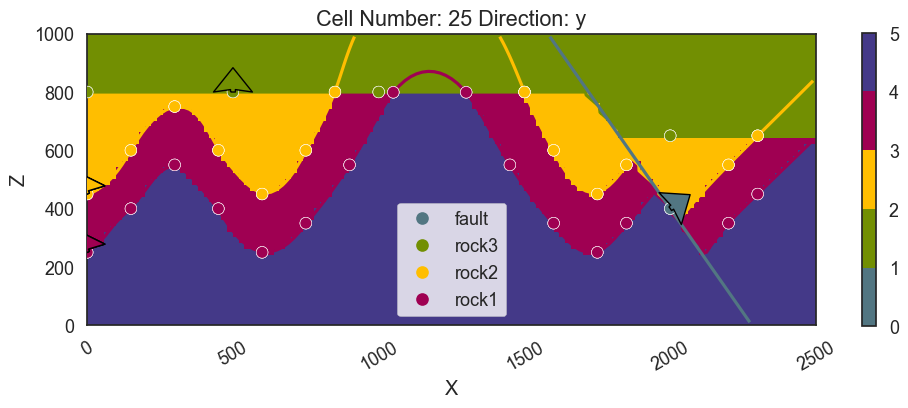

In [11]:
# Display the result in 2d section
gpv.plot_2d(geo_model, cell_number=25)

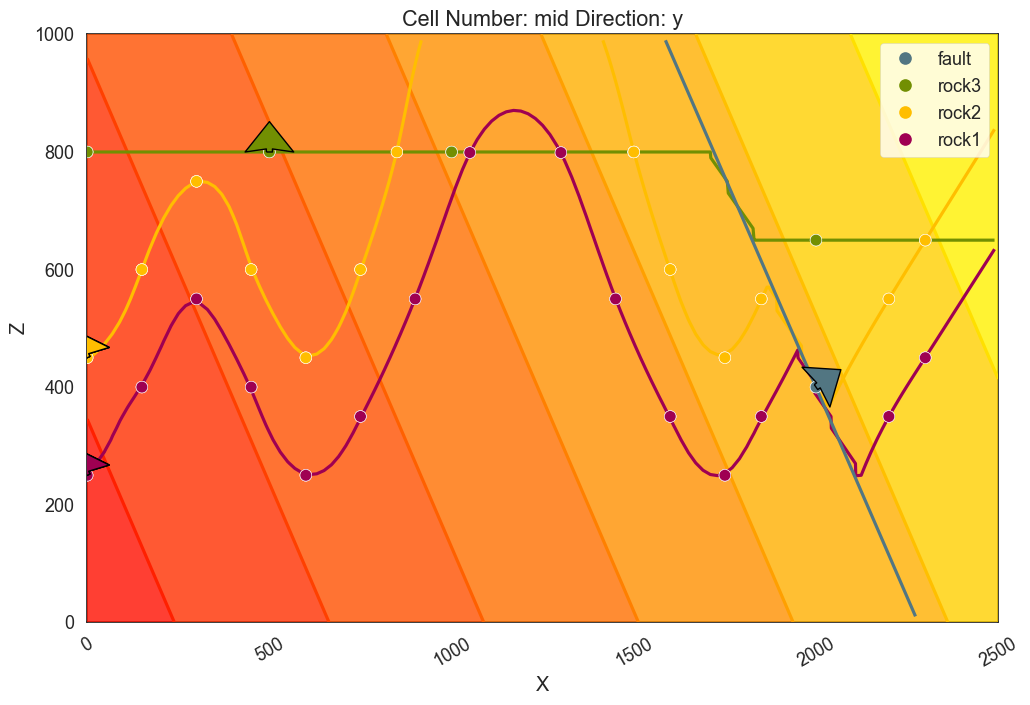

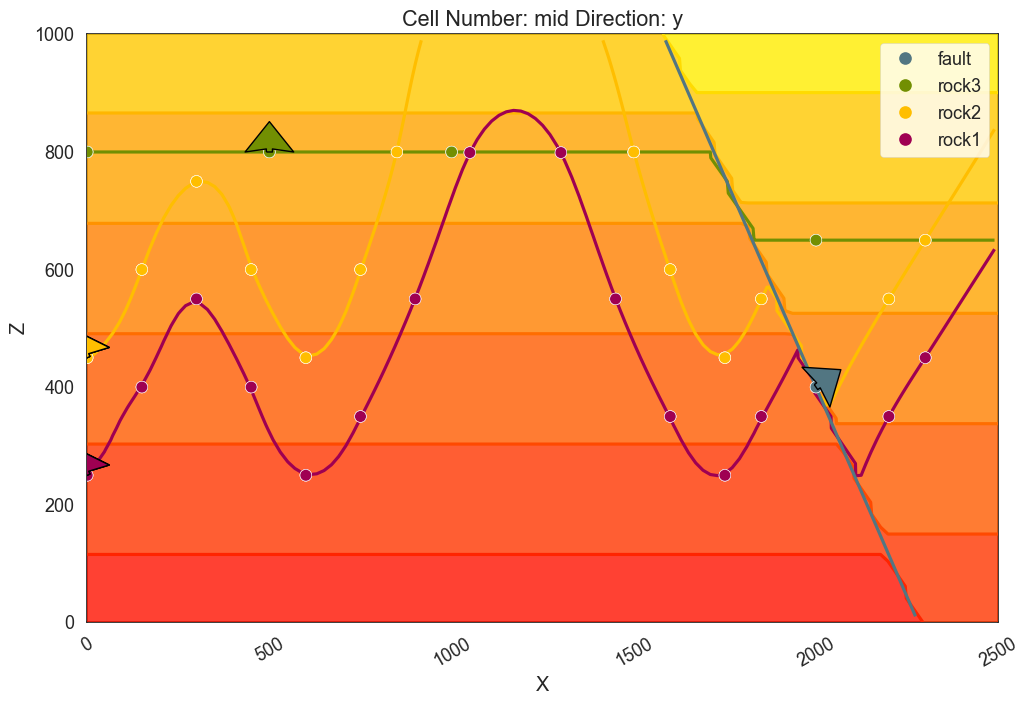

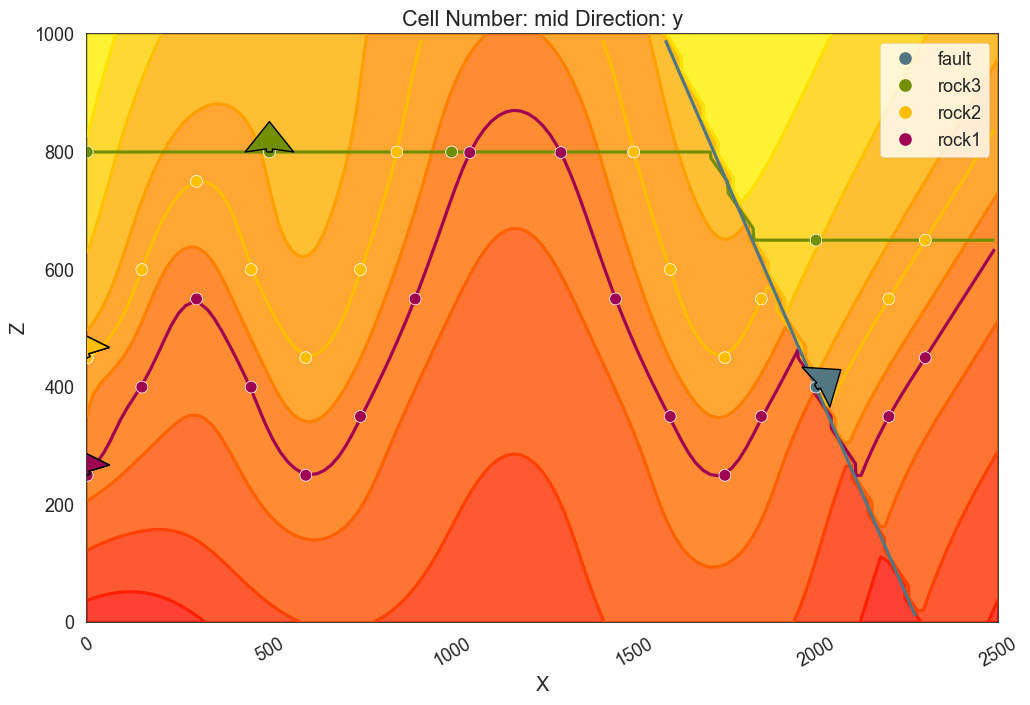

In [12]:
# Display the scalar field of the fault in 2d section
gpv.plot_2d(geo_model, show_scalar=True, show_lith=False, series_n=0)
gpv.plot_2d(geo_model, show_scalar=True, show_lith=False, series_n=1)
gpv.plot_2d(geo_model, show_scalar=True, show_lith=False, series_n=2)

In [13]:
# Display the result in 3D
gpv.plot_3d(geo_model)

### 5) Adding topography

In [14]:
# Setting a randomly generated topography
gp.set_topography_from_random(
    grid=geo_model.grid,
    fractal_dimension=2,
    d_z=np.array([700, 950]),
    topography_resolution=np.array([125, 50])
)

Active grids: GridTypes.DENSE|TOPOGRAPHY|NONE


In [15]:
# Recompute model as a new grid was added
gp.compute_model(geo_model)

Setting Backend To: AvailableBackends.numpy
Chunking done: 6 chunks
Chunking done: 14 chunks
Chunking done: 67 chunks
Chunking done: 6 chunks


Solutions(4 Octree Levels, 4 DualContouringMeshes)

C:\Users\vonha\PycharmProjects\egu25_gempy_workshop\venv\Lib\site-packages\gempy_viewer\API\_plot_2d_API.py:174: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  p.fig.show()


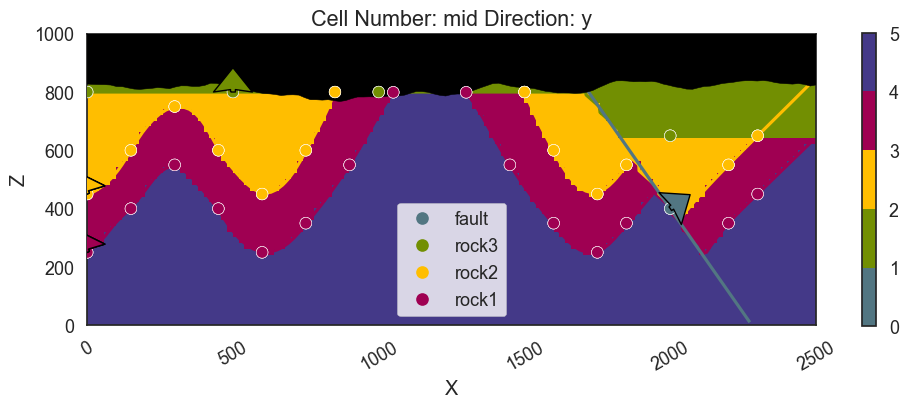

In [16]:
# Display a cross-section with topography
gpv.plot_2d(geo_model, show_topography=True)

C:\Users\vonha\PycharmProjects\egu25_gempy_workshop\venv\Lib\site-packages\gempy_viewer\API\_plot_2d_API.py:174: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  p.fig.show()


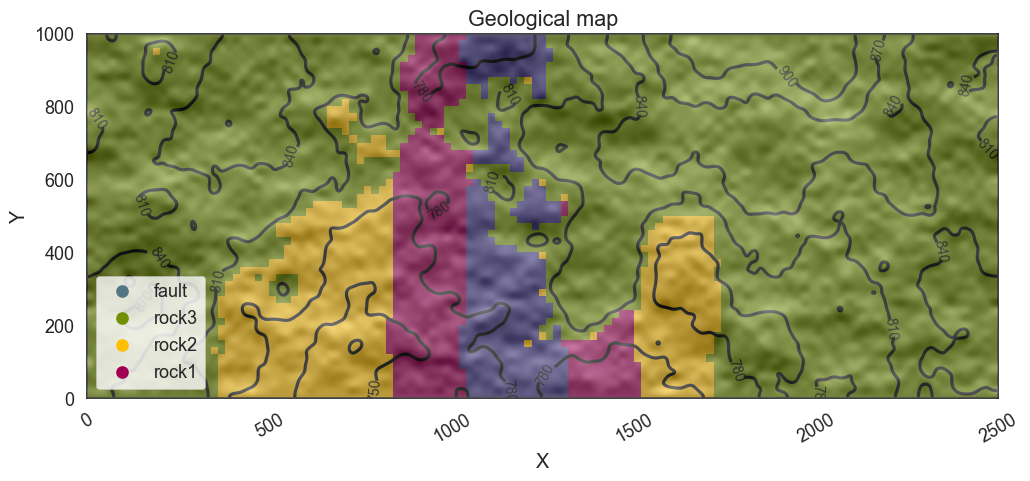

In [17]:
# Displaying a geological map
gpv.plot_2d(geo_model, show_topography=True, section_names=['topography'], show_boundaries=False, show_data=False)

In [18]:
# Display the 3d model with topography
gpv.plot_3d(geo_model, show_lith=True, show_topography=True)